<h1>シルエット係数（silhouette coefficient）</h1>

In [1]:
# シルエット係数は正解データを必要としないクラスタリングの指標である（が、これらの指標は実際にはあまりうまくいかない）
# シルエットスコアは、クラスタのコンパクトさを計算する。大きい方がよく、完全な場合で１になる
# クラスタがコンパクトなことは良いことだが、複雑な形状のクラスタはコンパクトにはならない
# 結局、クラスタリングがユーザにとって興味深いものになっているかを確認するには、クラスタを目で見て解析するしかない、という話である

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

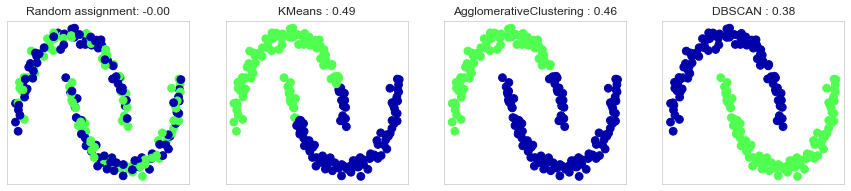

In [3]:
# DBSCANの結果の方がよさそうに見えるが、k-meansの方がシルエットスコアは高い
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import mglearn

X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize = (15, 3), subplot_kw = {"xticks":(),"yticks":()})

random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1], c = random_clusters, cmap = mglearn.cm3, s = 60)
axes[0].set_title(f"Random assignment: {silhouette_score(X_scaled, random_clusters):.2f}")

algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1], c = clusters, cmap = mglearn.cm3, s = 60)
    ax.set_title(f"{algorithm.__class__.__name__} : {silhouette_score(X_scaled, clusters):.2f}")